In [1]:
# Example of bayesian optimization for a 1d function from scratch
import numpy as np
import math
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
import matplotlib.pyplot as plt

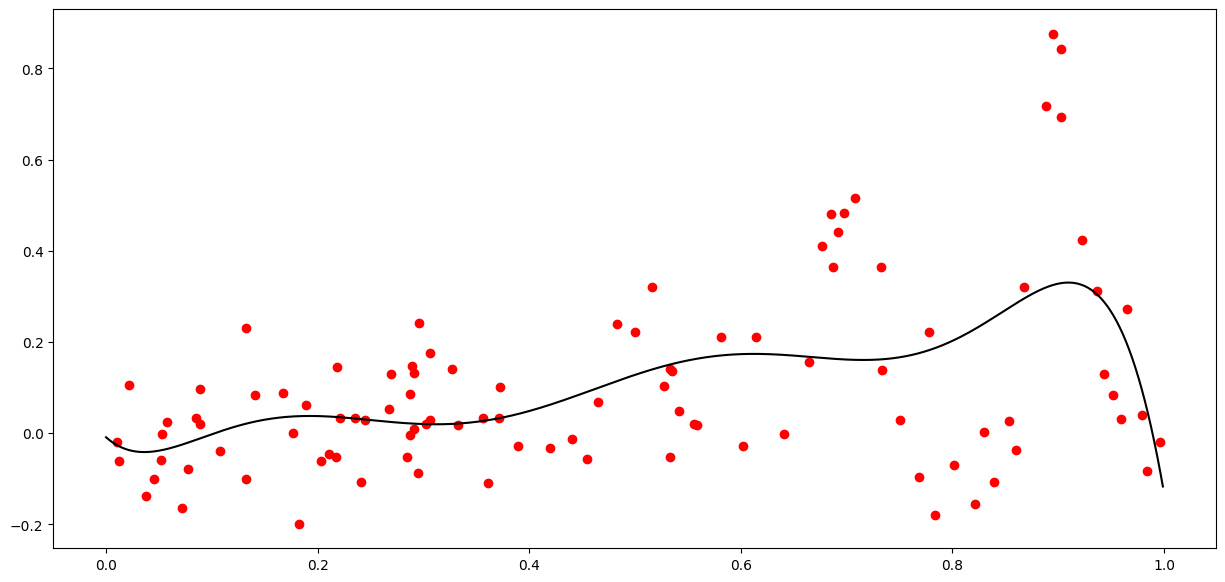

In [ ]:
# Objective function
def objective(x, noise=0.1):
  noise = np.random.normal(loc=0, scale=noise)
  return (x**2 * np.sin(5 * math.pi * x)**6.0) + noise

# surrogate or approximation for the objective function
def surrogate(model, X):
	return model.predict(X, return_std=True)

# optimize the acquisition function
def acquisition(X, model):
	# calculate the acquisition function for each sample
	yhat, _ = surrogate(model, X)
	best = max(yhat)

  # random search, generate random samples
	Xsamples = np.random.random(100)
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	# calculate mean and stdev via surrogate function
	mu, std = surrogate(model, Xsamples) # first val -> Predictions and second val -> Confidiance Interval
	# calculate the probability of improvement
	probs = norm.cdf((mu - best) / (std+1E-9))
	# locate the index of the largest scores
	ix = np.argmax(probs)
	return Xsamples[ix, 0]

# plot real observations vs surrogate function
def plot(X, y, model):
	plt.figure(figsize = (15, 7))
	# scatter plot of inputs and real objective function
	plt.scatter(X, y, color='red')
	# line plot of surrogate function across domain
	Xsamples = np.arange(0, 1, 0.001)
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	ysamples, _ = surrogate(model, Xsamples)
	plt.plot(Xsamples, ysamples, color='black')
	# show the plot
	plt.show()

# sample the domain sparsely with noise
X = np.random.random(100)
y = np.asarray([objective(x) for x in X])
# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)
# plot before hand
plot(X, y, model)

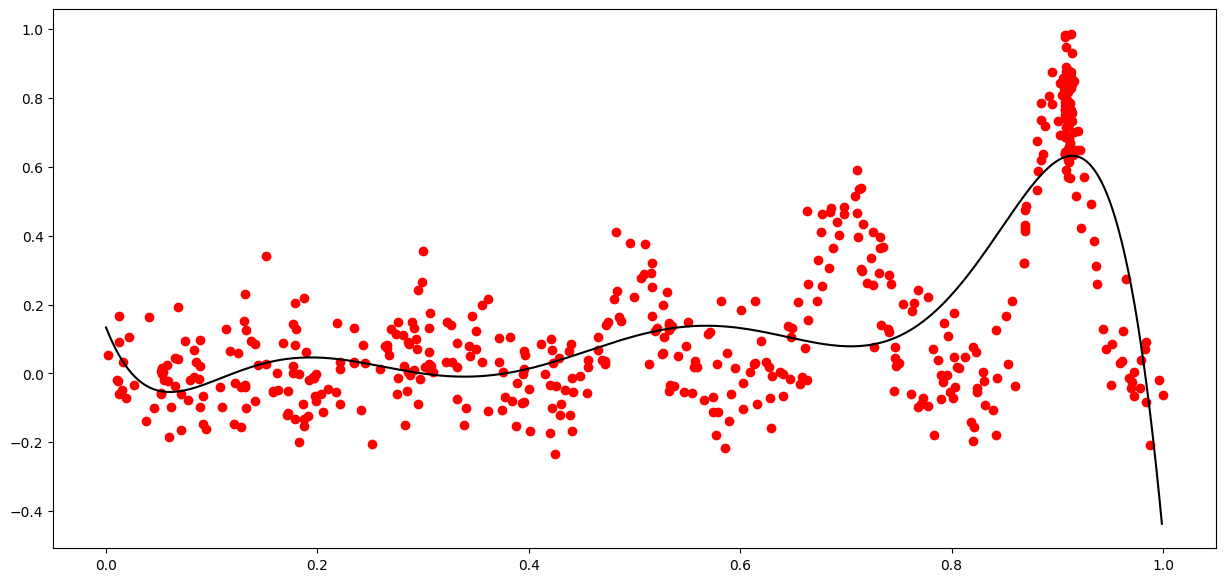

Best Result: x = 0.913, y = 0.986


In [9]:
# perform the optimization process
for i in range(100):
	# select the next point to sample
	x = acquisition(X, model)
	# sample the point
	actual = objective(x)
	# summarize the finding
	# est, _ = surrogate(model, [[x]])
	# add the data to the dataset
	X = np.vstack((X, [[x]]))
	y = np.vstack((y, [[actual]]))
	# update the model
	model.fit(X, y)

# plot all samples and the final surrogate function
plot(X, y, model)
# best result
ix = np.argmax(y)
print('Best Result: x = %.3f, y = %.3f' % (X[ix, 0], y[ix, 0]))

In [1]:
# Objective function -> x^2 + sin(5pi * x)^6 + noise
# This function is unknown because we are adding noise into it and that noise is random
def objective(x, noise=0.1):
  noise = np.random.normal(loc=0, scale=noise)
  return (x**2 * np.sin(5 * math.pi * x)**6.0) + noise

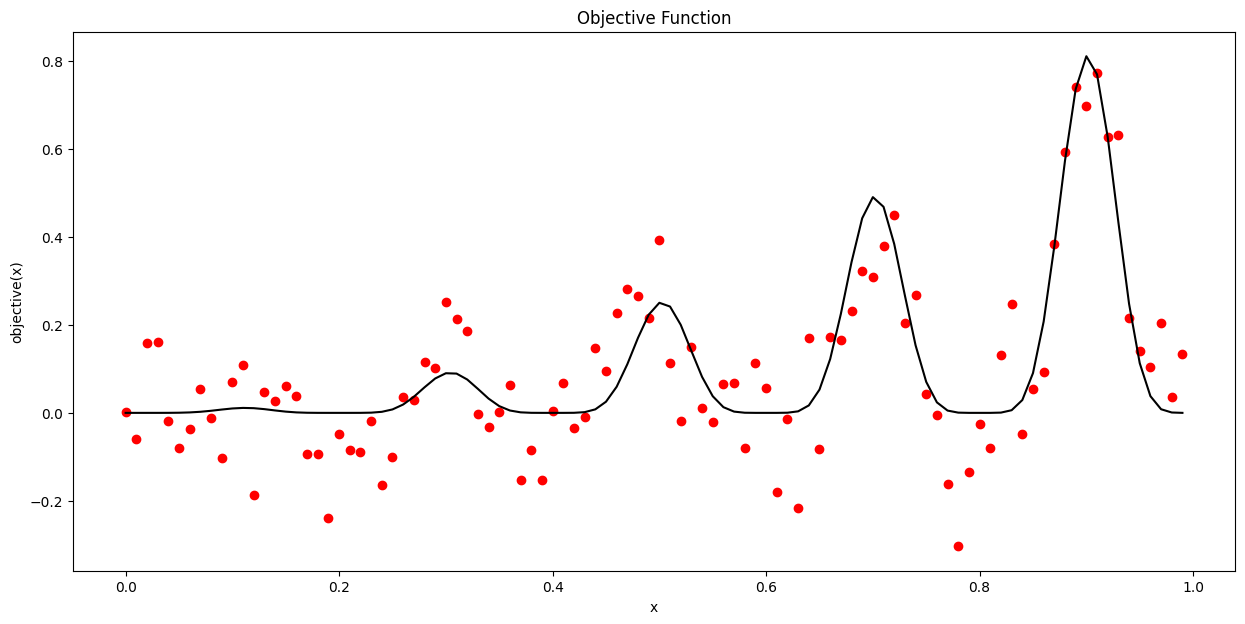

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Generate data
x_vals = np.arange(0, 1, 0.01) # Parameters Values - Selected from random sampling
y_vals = np.array([objective(x) for x in x_vals]) # Accuracy for the parameter values

y_actual = np.array([objective(x, noise=0) for x in x_vals]) # Behavour of plot without noise

# Plot the function
plt.figure(figsize = (15, 7))
plt.scatter(x_vals, y_vals, color='red')
plt.plot(x_vals, y_actual, color='black')
plt.title('Objective Function')
plt.xlabel('x')
plt.ylabel('objective(x)')
plt.show()